In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy

In [2]:
path1 = r'E:\netData\MAGzip\MAG Nobel\2 Nobelpapers\1M NobelCitingpapers.zip'
path2 = r'E:\netData\MAGzip\MAG Nobel\2 Nobelpapers\712 Nobelpapers.zip'
path3 = r'E:\netData\MAGzip\MAG Nobel\2 Nobelpapers\712 NobelpapersCD.zip'

In [3]:
f1 = pd.read_csv(path1)
f2 = pd.read_csv(path2)
f3 = pd.read_csv(path3)

In [10]:
f3['Field'] = f2['Field']
f31 = f3[f3['Field'] == 'Physics']
f32 = f3[f3['Field'] == 'Chemistry']
f33 = f3[f3['Field'] == 'Medicine']

# FIG 2

In [33]:
scipy.stats.kstest(f31['ni'] , f31['nj'])

KstestResult(statistic=0.7142857142857143, pvalue=1.2851122610811677e-53, statistic_location=21, statistic_sign=-1)

In [34]:
scipy.stats.kstest(f32['ni'] , f32['nj'])

KstestResult(statistic=0.4727272727272727, pvalue=1.3431545833923217e-22, statistic_location=10, statistic_sign=-1)

In [35]:
scipy.stats.kstest(f33['ni'] , f33['nj'])

KstestResult(statistic=0.4290909090909091, pvalue=4.222999899804361e-23, statistic_location=79, statistic_sign=-1)

Text(0.5, 0, 'publishing year')

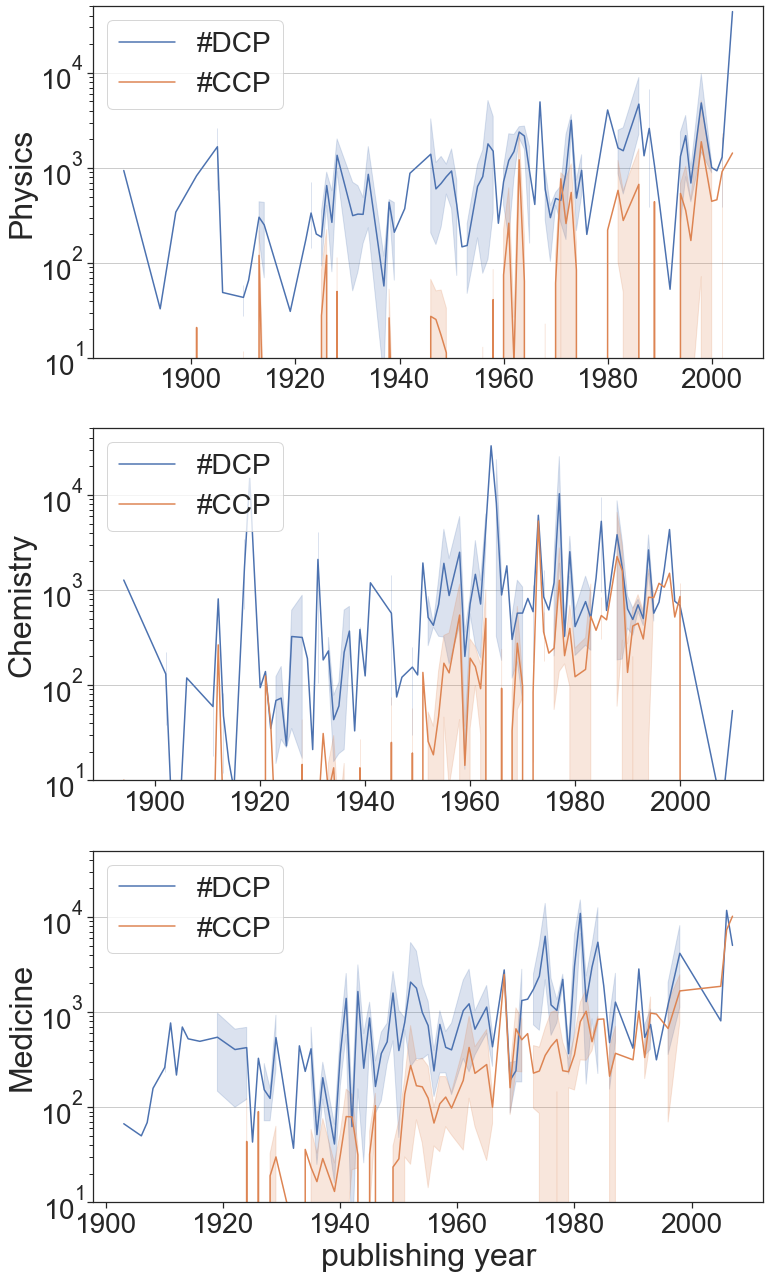

In [30]:
sns.set_theme(style="ticks")
plt.subplots(3,1,figsize=(12,22))
for _ in range(3):
    f = [f31 , f32 , f33][_]
    ylabel = ['Physics' , 'Chemistry' , 'Medicine'][_]
    ax = plt.subplot(3,1,_ + 1)
    sns.lineplot(data=f,x="paperyear", y="ni", markers=["o"],label = '#DCP')
    sns.lineplot(data=f,x="paperyear", y="nj", markers=["D"],label = '#CCP')

    ax.yaxis.grid(True)
    ax.set_yscale("log")
    plt.ylim(10,50000)
    plt.xticks(size = 28)
    plt.yticks([10,100,1000,10000],size = 28)
    plt.legend(fontsize = 28)
    plt.ylabel(ylabel,fontsize = 32)
    plt.xlabel(r'',fontsize = 0)
plt.xlabel(r'publishing year',fontsize = 32)

# fig 2

In [62]:
x_pos = [1,2,3,5,6,7,]
d1 = f31['ni']
d2 = f32['ni']
d3 = f33['ni']
d5 = f31['nj']
d6 = f32['nj']
d7 = f33['nj']
d = [np.mean(d1),np.mean(d2),np.mean(d3),np.mean(d5),np.mean(d6),np.mean(d7)]
std = [np.std(d1)*len(d1)**-0.5,np.std(d2)*len(d2)**-0.5,np.std(d3)*len(d3)**-0.5,np.std(d5)*len(d5)**-0.5,np.std(d6)*len(d6)**-0.5,np.std(d7)*len(d7)**-0.5]
colors = ["#154360","#1F618D","#2980B9","#784212","#AF601A","#E67E22"]

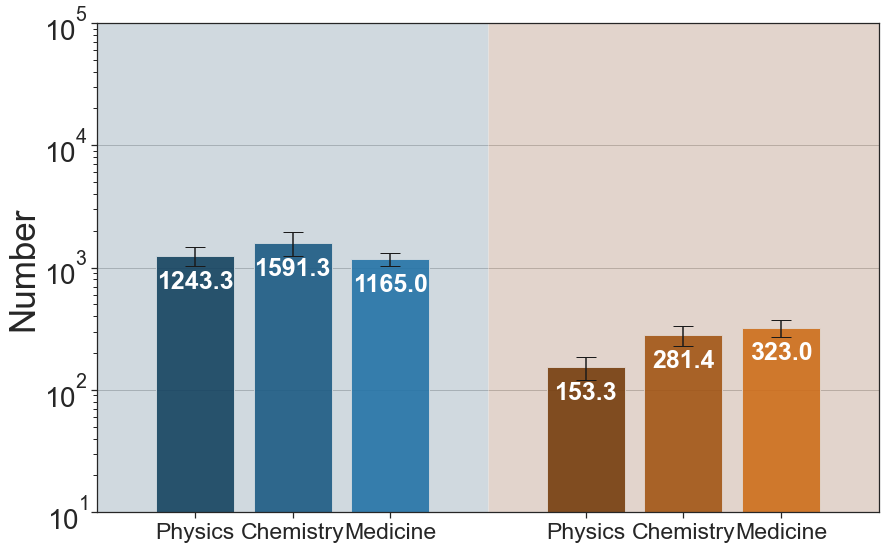

In [68]:
f, ax = plt.subplots(figsize=(14, 9))
plt.bar(x_pos, d, yerr=std,align='center', color= colors,alpha=0.9,capsize=10)
ax.yaxis.grid(True)
ax.set_yscale("log")
plt.xlim(0,8)
plt.xticks(x_pos,['Physics','Chemistry','Medicine','Physics','Chemistry','Medicine'],fontsize = 23)
for _ in range(len(d)):
    plt.text(x_pos[_],d[_]*0.55 , str(np.round(d[_] , 1)),fontsize = 25,c = 'white', ha='center', fontweight='bold')
plt.yticks([10,100,1000,10000,100000],size = 28)
plt.ylabel(r'Number',fontsize = 35)
ax.axvspan(min(x_pos)-1, max(x_pos) / 2+0.5, facecolor='#154360', alpha=0.2)
ax.axvspan(max(x_pos) / 2+0.5, max(x_pos)+1, facecolor='#6E2C00', alpha=0.2)

In [69]:
print(scipy.stats.mannwhitneyu(d1 , d5, alternative='two-sided'))
print(scipy.stats.mannwhitneyu(d2 , d6, alternative='two-sided'))
print(scipy.stats.mannwhitneyu(d3 , d7, alternative='two-sided'))

MannwhitneyuResult(statistic=42216.0, pvalue=6.033181049201208e-48)
MannwhitneyuResult(statistic=38129.0, pvalue=9.267362877326636e-26)
MannwhitneyuResult(statistic=58534.0, pvalue=8.176165328168898e-29)


In [92]:
x_pos = [1,2,3,]
d1 = f31['ni']
d2 = f32['ni']
d3 = f33['ni']
d = [np.mean(d1),np.mean(d2),np.mean(d3)]
std = [np.std(d1)*len(d1)**-0.5,np.std(d2)*len(d2)**-0.5,np.std(d3)*len(d3)**-0.5]
colors = ["#641E16","#922B21","#C0392B"]

Text(0, 0.5, 'Avg. Citation of Nobel')

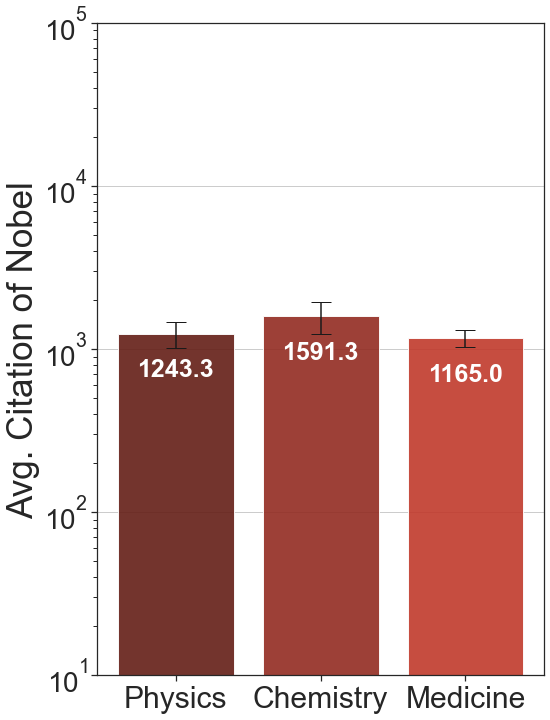

In [95]:
f, ax = plt.subplots(figsize=(8, 12))
plt.bar(x_pos, d, yerr=std,align='center', color= colors,alpha=0.9,capsize=10)
ax.yaxis.grid(True)
ax.set_yscale("log")
plt.xticks(x_pos,['Physics','Chemistry','Medicine'],fontsize = 30)
for _ in range(len(d)):
    plt.text(x_pos[_],d[_]*0.55 , str(np.round(d[_] , 1)),fontsize = 25,c = 'white', ha='center', fontweight='bold')
plt.yticks([10,100,1000,10000,100000],size = 28)
plt.ylabel(r'Avg. Citation of Nobel',fontsize = 35)

Text(0.5, 0, 'publishing year')

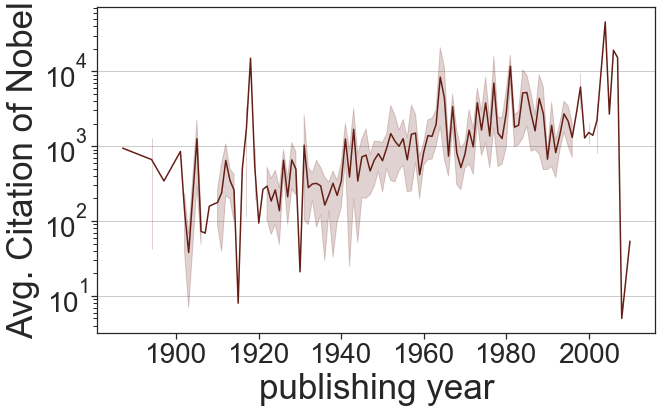

In [88]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(10, 6))
g = sns.lineplot(
    data=f2,x="paperyear",c='#641E16', y="cit")
ax.yaxis.grid(True)
ax.set_yscale("log")
plt.xticks(size = 28)
plt.yticks(size = 28)
plt.ylabel(r'Avg. Citation of Nobel',fontsize = 35)
plt.xlabel(r'publishing year',fontsize = 35)

Text(0.5, 0, 'publishing year')

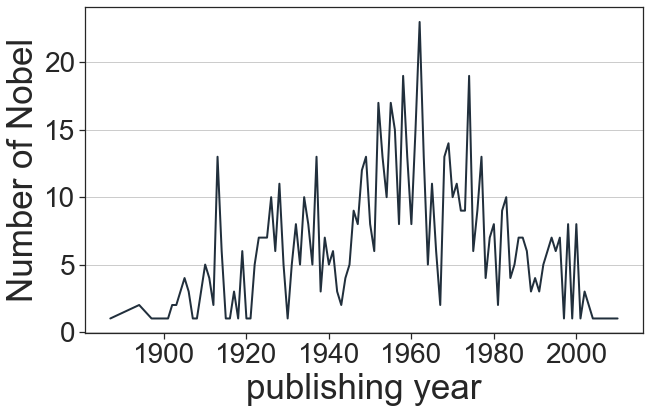

In [90]:
d = f2['paperyear'].groupby(f2['paperyear']).count()

f, ax = plt.subplots(figsize=(10, 6))
ax.plot(d.index, d.values, linewidth=2.0, c = "#212F3C")
ax.yaxis.grid(True)
plt.xticks(size = 28)
plt.yticks(size = 28)
plt.ylabel(r'Number of Nobel',fontsize = 35)
plt.xlabel(r'publishing year',fontsize = 35)